# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [ ]:
%pip install numpy
%pip install pandas

Import the core data science libraries:

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

This exercise uses [U.S. Treasury-Owned Gold](./data/treas_gold_all.csv), downloaded from [Fiscal Data](https://fiscaldata.treasury.gov/datasets/status-report-government-gold-reserve/u-s-treasury-owned-gold) as a CSV file at Feburary 27, 2024.

In [3]:
# place your code into this Code cell
df: pd.DataFrame = pd.read_csv("./data/treas_gold_all.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### A Brief Inspection of the Dataset
The following code uses `df.sample` function with parameter `n=5` to display `5` random records from the entrie dataset.

In [3]:
# Show 5 random rows of the dataset.
df.sample(n=5)

,Record Date,Facility Description,Form Description,Location Description,Fine Troy Ounces,Book Value,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
593,2017-11-30,Mint Held Gold - Deep Storage,Gold Bullion,"Fort Knox, KY",1.473419e+08,6.221097e+09,2,2018,1,2017,4,11,30
437,2019-07-31,Federal Reserve Bank Held Gold,Gold Bullion,Federal Reserve Banks - Display,1.993321e+03,8.416240e+04,6,2019,4,2019,3,7,31
769,2016-01-31,Mint Held Gold - Deep Storage,Gold Bullion,"Fort Knox, KY",1.473419e+08,6.221097e+09,2,2016,2,2016,1,1,31
288,2021-01-31,Federal Reserve Bank Held Gold,Gold Bullion,Federal Reserve Banks - Display,1.993321e+03,8.416240e+04,6,2021,2,2021,1,1,31
451,2019-05-31,Federal Reserve Bank Held Gold,Gold Coins,Federal Reserve Banks - Display,3.774340e+02,1.593611e+04,8,2019,3,2019,2,5,31


### Each Column and their Datatypes
The following code calls `df.types` attribute to get the list of all column name with their datatypes.

In [4]:
# Show each columns and their datatypes.
df.dtypes

Record Date                 object
Facility Description        object
Form Description            object
Location Description        object
Fine Troy Ounces           float64
Book Value                 float64
Source Line Number           int64
Fiscal Year                  int64
Fiscal Quarter Number        int64
Calendar Year                int64
Calendar Quarter Number      int64
Calendar Month Number        int64
Calendar Day Number          int64
dtype: object

### Unique Features
#### Metadata
`df.info` gives a summary of metadata of the entire dataset, which shows that **the dataset contains 13 columns and 960 records in total**.

The summary also shows several special features:
1. **No Empty Field** - Each column has exactly 960 non-null records, the same number of total records.
2. **Date Recording** - Date is represented in 2 ways. One is a combined format stored in column `Record Date`, the other is stored separately, with year in `Calendar Year`, month in `Calendar Month Number`, and day in `Calendar Day Number`. Their format difference will be explored in [Date Presentation Format](#date-presentation-format).
3. **Presence of Quarter Number** - Asides from date, the dataset also include columns that stores the quarter when the record was entered (a special feature for datasets about budgets or economics).
4. **Year and Quarter Numbers** - This dataset also records both year and quarter number in 2 ways: one is marked with "fiscal" (column `Fiscal Year`, `Fiscal Quarter Number`); the other is marked with "calendar" (column `Calendar Year` and `Calendar Quarter Number`). Their difference will be explored in [Year and Quarter Numbers](#year-and-quarter-numbers).

In [5]:
# Show unique features.
# Features from Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record Date              960 non-null    object 
 1   Facility Description     960 non-null    object 
 2   Form Description         960 non-null    object 
 3   Location Description     960 non-null    object 
 4   Fine Troy Ounces         960 non-null    float64
 5   Book Value               960 non-null    float64
 6   Source Line Number       960 non-null    int64  
 7   Fiscal Year              960 non-null    int64  
 8   Fiscal Quarter Number    960 non-null    int64  
 9   Calendar Year            960 non-null    int64  
 10  Calendar Quarter Number  960 non-null    int64  
 11  Calendar Month Number    960 non-null    int64  
 12  Calendar Day Number      960 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 97.6+ KB


#### Date Presentation Format
The following code shows column `Record Date`, `Calendar Year`, `Calendar Month Number`, and `Calendar Day Number` for a few randomly choosen records. Observe that *for each record, both row represents the same date*. Is this the same for all records?

In [6]:
# Feature of date presentation.
df.sample(n=5)[[
    "Record Date", 
    "Calendar Year", 
    "Calendar Month Number", 
    "Calendar Day Number"]]

,Record Date,Calendar Year,Calendar Month Number,Calendar Day Number
617,2017-08-31,2017,8,31
654,2017-04-30,2017,4,30
888,2014-10-31,2014,10,31
39,2023-09-30,2023,9,30
299,2020-12-31,2020,12,31


The following code verifies that **every record was created on the exact same day the data was collected** as the output table is empty.

In [7]:
# Search records that have different records and calendar time
uneq_rows = [] # store the index of satisfied rows

for row_index in df.index:
    # Get current row
    row = df.loc[row_index]
    
    # Create calendar date
    calendar_date: date
    try:
        calendar_date = date(row["Calendar Year"], 
                             row["Calendar Month Number"], 
                             row["Calendar Day Number"])
    except Exception:
        # Invalid calendar date
        uneq_rows.append(row_index)
        continue

    # Compare `Record Date` and `calendar_date`
    if row["Record Date"] == calendar_date.isoformat():
        continue
    uneq_rows.append(row_index)

# Display satisfied rows
df.loc[uneq_rows, 
   [
        "Record Date", 
        "Calendar Year", 
        "Calendar Month Number", 
        "Calendar Day Number"
    ]
]

,Record Date,Calendar Year,Calendar Month Number,Calendar Day Number


#### Year and Quarter Numbers
The following code shows column `Record Date`, `Fiscal Year`, `Calendar Year`, `Fiscal Quarter Number`, and `Calendar Quarter Number` for a few randomly choosen records. Observe that **next fiscal year and its first fiscal quarter starts in October of the current calendar year** (as the 4th calendar quarter corresponds to the 1st fiscal quarter of the next fiscal year in the table shown below).

In [54]:
# Feature of Year and Quarter number
df.sample(n=5)[[
    "Record Date", 
    "Fiscal Year", 
    "Calendar Year", 
    "Fiscal Quarter Number", 
    "Calendar Quarter Number"
]]

,Record Date,Fiscal Year,Calendar Year,Fiscal Quarter Number,Calendar Quarter Number
906,2014-08-31,2014,2014,4,3
217,2021-10-31,2022,2021,1,4
411,2019-10-31,2020,2019,1,4
552,2018-04-30,2018,2018,3,2
416,2019-09-30,2019,2019,4,3


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

After careful review, I believe **the current dataset does not require any munging** for following reasons:
+ **No Empty Fields** - (as shown in [Metadata](#metadata) above)
+ **No Missing Records** - (see [Missing Records Check](#missing-records-check))
+ **Fields Normalized, Valid, and Consistent** - (see [Fields Check](#fields-check))
+ **No Duplicated Records or Columns** - (see [Duplication Check](#duplication-check))

#### Missing Records Check
<u>Check if there are missing records</u> by calculating the frequency of each value of record dates. Observing the data, I noticed that there should have exactly `8` records for each `Record Date` based on the combinations of `Form Description` and `Location Description` (as shown below).

In [8]:
df.head(8)

,Record Date,Facility Description,Form Description,Location Description,Fine Troy Ounces,Book Value,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2024-01-31,Mint Held Gold - Deep Storage,Gold Bullion,"Denver, CO",4.385371e+07,1.851600e+09,1,2024,2,2024,1,1,31
1,2024-01-31,Mint Held Gold - Deep Storage,Gold Bullion,"Fort Knox, KY",1.473419e+08,6.221097e+09,2,2024,2,2024,1,1,31
2,2024-01-31,Mint Held Gold - Deep Storage,Gold Bullion,"West Point, NY",5.406733e+07,2.282842e+09,3,2024,2,2024,1,1,31
3,2024-01-31,Mint Held Gold - Working Stock,Gold Coins,"All Locations- Coins, blanks, miscellaneous",2.783219e+06,1.175136e+08,4,2024,2,2024,1,1,31
4,2024-01-31,Federal Reserve Bank Held Gold,Gold Bullion,Federal Reserve Banks - NY Vault,1.337699e+07,5.648059e+08,5,2024,2,2024,1,1,31
5,2024-01-31,Federal Reserve Bank Held Gold,Gold Bullion,Federal Reserve Banks - Display,1.993321e+03,8.416240e+04,6,2024,2,2024,1,1,31
6,2024-01-31,Federal Reserve Bank Held Gold,Gold Coins,Federal Reserve Banks - NY Vault,7.345207e+04,3.101308e+06,7,2024,2,2024,1,1,31
7,2024-01-31,Federal Reserve Bank Held Gold,Gold Coins,Federal Reserve Banks - Display,3.774340e+02,1.593611e+04,8,2024,2,2024,1,1,31


The following code check if each date appears exactly 8 times and return the `Record Date` that has frequency different from `8`. As the output is empty, there is no missing or duplicate records observed from this check.

In [9]:
for index, freq in enumerate(df["Record Date"].value_counts()):
    if freq == 8:
        continue
    print(f"{index} has frequency {freq}")

#### Fields Check
1. <u>Check Normality of String Fields</u>. The following code calls `value_counts` method to count the frequency of each value in column `Facility Description`, `Form Description`, and `Location Description` (all columns with stirng-type value). As the values are very different from each other, and there is no value with very low frequency, I believe all fields with string-type values are already normalized.

In [10]:
# Check normality of fields with string value.
print(df["Facility Description"].value_counts())

print("---------------------------------------------------")
print(df["Form Description"].value_counts())

print("---------------------------------------------------")
print(df["Location Description"].value_counts())

Facility Description
Federal Reserve Bank Held Gold    480
Mint Held Gold - Deep Storage     360
Mint Held Gold - Working Stock    120
Name: count, dtype: int64
---------------------------------------------------
Form Description
Gold Bullion    600
Gold Coins      360
Name: count, dtype: int64
---------------------------------------------------
Location Description
Federal Reserve Banks - NY Vault               240
Federal Reserve Banks - Display                240
Denver, CO                                     120
Fort Knox, KY                                  120
West Point, NY                                 120
All Locations- Coins, blanks, miscellaneous    120
Name: count, dtype: int64


2. <u>Check validity of quarter numbers</u> by searching for rows with invalid `Fiscal Quarter Number` or `Calendar Quarter Number`. As there is no records found, all quarter numbers are also valid.

In [11]:
# Check Quarter Validity.
df[
    (df["Fiscal Quarter Number"] < 0) 
    | (df["Fiscal Quarter Number"] > 4)
    | (df["Calendar Quarter Number"] < 0) 
    | (df["Calendar Quarter Number"] > 4)
]

,Record Date,Facility Description,Form Description,Location Description,Fine Troy Ounces,Book Value,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number


3. Note that the validity of calendar dates (i.e., `Calendar Year`, `Calendar Month Number`, `Calendar Day`) can be deduced as the calendar date for each record is the same as that of `Record Date` and a `date` object can be successfully created (as shown in [Date Presentation Format](#date-presentation-format)).

4. <u>Check the consistency between "Fiscal" and corresponding "Calender" columns with the assumption that the next fiscal year starts in the October (fourth calendar quarter) of the current year</u>. The following code searches for such columns that violates this assumption. As the output has no records, "Fiscal" and corresponding "Calender" columns are already consistent.

In [12]:
# Check between "Fiscal" and corresponding "Calender" columns.
inconsis_rows = []

for row_index in df.index:
    # Get current row.
    row = df.loc[row_index]

    # Get target values.
    fiscal_year = row["Fiscal Year"]
    fiscal_quarter = row["Fiscal Quarter Number"]
    calendar_year = row["Calendar Year"]
    calendar_quarter = row["Calendar Quarter Number"]

    # Check if next fiscal year starts in October.
    if fiscal_year == calendar_year \
       and fiscal_quarter == calendar_quarter + 1:
        continue
    if fiscal_year == calendar_year + 1 \
       and fiscal_quarter == calendar_quarter - 3:
        # Start of next fiscal year
        continue

    inconsis_rows.append(row_index)

# Display satisfied rows.
df.loc[inconsis_rows, 
   [
        "Record Date", 
        "Fiscal Year", 
        "Fiscal Quarter Number", 
        "Calendar Year", 
        "Calendar Quarter Number"
    ]
]

,Record Date,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number


#### Duplication Check
1. The output of `df.info` in [Metadata](#metadata) and `df.head` in [A Brief Inspection of the Dataset](#a-brief-inspection-of-the-dataset) have shown that <u>the dataset contains no duplicated columns</u> as no columns have identical names and each column contains very different values.

2. <u>Check duplication of records</u>. The following code searches for identical records in the dataset and print the index of rows with duplications. An empty output indicates no duplication in rows.

In [13]:
for (index, row) in enumerate(df.duplicated()):
    if not row:
        continue
    print(f"Record {index} has duplications")

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

1. <u>Average `Book Value` of gold stored in a facility for the latest month</u>. The latest records were created on `2024-01-31`. So we retrive records created on that date and calculate average. It turns out each facility on average stores more than 1.8billion dollars!

In [14]:
# Retrive records created on `2024-01-31`
records = df[ 
    (df["Record Date"] == "2024-01-31") 
    & (df["Form Description"] == "Gold Bullion")
]["Book Value"]

# There are 6 Locations.
print("The mean value is %.2f USD." % (records.sum() / 6))

The mean value is 1820071516.54 USD.


2. <u>Standard deviation of `Book Value` stored in `West Point, NY`</u>. It turns out the standard deviation is about `0.00` USD. This means there is no net flow of gold to or from vault `West Point, NY` in over 8 years!

In [15]:
sd = df[ df["Location Description"] == "West Point, NY" ]["Book Value"].std()

print("The standard deviation is %.2f USD." % sd)

The standard deviation is 0.00 USD.


3. <u>The least value of gold bullion stored in a facility in 2024</u>. It turns out that the least amount of gold coins stored in one facility has only a value of 81462.40 USD, a tiny portion of the average booking value in one facility above!

In [16]:
# Retrive records created on `2024-01-31`.
records = df[ 
    (df["Record Date"] == "2024-01-31")
    & (df["Form Description"] == "Gold Bullion")
]

# Find the location with the minimum value.
minimum = records["Book Value"].min()

print("The minimum value stored is %.2f USD." % minimum)

The minimum value stored is 84162.40 USD.


4. <u>The second largest book value of gold bullion stored in a facility in January 2024</u>. The second largest value found is about 2.3billion USD, much larger than the minimum found by the previous code and slightly larger than the average booking value stored in one facility. This implies the maximum book value could be much more than the average in order to balance the minimum found in the previous code.

In [18]:
# Retrive records created on `2024-01-31`.
records = df[ 
    (df["Record Date"] == "2024-01-31")
    & (df["Form Description"] == "Gold Bullion")
]

# Sort records.
records = records.sort_values(by="Book Value", ascending=False)

# Get second largest value.
val = records.loc[records.first_valid_index() + 1]["Book Value"]

print("The second largest book value is %.2f USD." % val)

The second largest book value is 2282841677.17 USD.


5. <u>The range of booking value of gold coins in `Federal Reserve Banks - Display` over the entire time range</u>. The range found is 853.45 USD, a value much smaller than the book of gold coin stored in that facility (which is about 15936 USD). This implies that there does not have much net flow of gold coins into or out of this facility.

In [19]:
# Retrive records of gold coins in `Federal Reserve Banks - Display`.
records = df[ 
    (df["Form Description"] == "Gold Coins")
    & (df["Location Description"] == "Federal Reserve Banks - Display")
]["Book Value"]

print("The range is %.2f USD." % (records.max() - records.min()))

The range is 853.45 USD.


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

1. <u>Distribution of gold among locations in January, 2024"</u>. Figure 1 shows that most gold are stored not in `Federal Reserve Banks` (i.e., `Federal Reserve Banks - NY Vault` and `Federal Reserve Banks - Display`) but in the facility in `Fort Knox, KY`. In fact, over 90% of the gold are specific deep storages, and the gold used to make coins stored in other places (`All Locations- Coins, blanks, miscellaneous`) and in category `Federal Reserve Banks - Display` consist of even less than 2% of the total value of gold stored.

<Axes: title={'center': 'Distribution of Value of Gold Stored in Each Location'}>

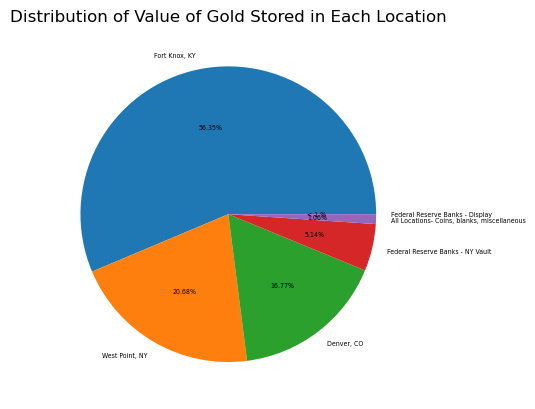

In [20]:
# Get the records created at `2024-01-31`.
records = df[
    df["Record Date"] == "2024-01-31"
]

# Extract and sort data
fig1_data = records.groupby("Location Description") \
                   .agg({"sum"})
fig1_data = fig1_data.sort_values(by=("Book Value", "sum"), ascending=False)

# Generate plot
fig1_data.plot(kind="pie", 
               title="Distribution of Value of Gold Stored in Each Location", 
               y="Book Value", 
               legend=False, 
               autopct=lambda x: ("{:.2f}%".format(x) if x >= 1 else "< 1 %"), 
               fontsize=4.5, 
               ylabel="")

2. <u>Distribution of value of gold in each type of facility in January, 2024</u>. Figure 2 shows that over 90% of book value of gold comes from US national deep storage (`Mint Held Gold - Deep Storage`), the federal reserve holds most of the rest, while the gold in local bank or other places (i.e., `Mint Held Gold - Working Stock`, definition see [Status Report of U.S. Government Gold Reserve](https://www.fiscal.treasury.gov/reports-statements/gold-report/21-02.html)) are only a tiny portion of US gold storage.

<Axes: title={'center': 'Distribution of Value of Gold Stored in each Type of Facility'}>

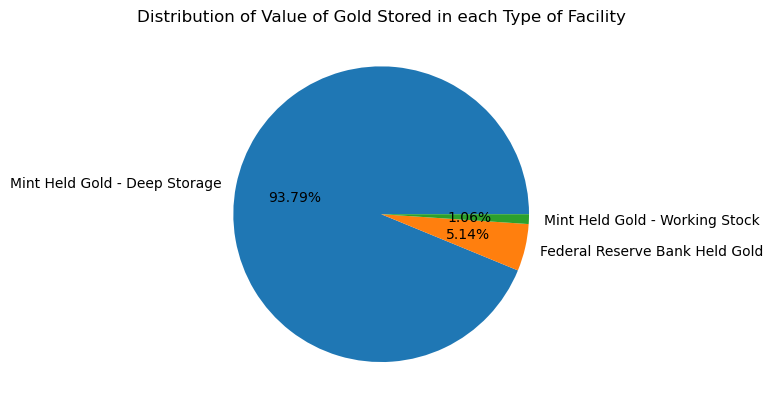

In [21]:
# Get the records created at `2024-01-31`.
records = df[
    df["Record Date"] == "2024-01-31"
]

# Extract and sort data
fig2_data = records.groupby("Facility Description") \
                   .agg({"sum"})
fig2_data = fig2_data.sort_values(by=("Book Value", "sum"), ascending=False)

# Generate plot
fig2_data.plot(kind="pie",
               title="Distribution of Value of Gold Stored in each Type of Facility", 
               y="Book Value", 
               legend=False, 
               autopct=lambda x: ("{:.2f}%".format(x)), 
               ylabel="")

3. <u>Book value of gold bullions stored in each facility in January, 2024</u>. Figure 3 the book value of gold bullions for each facility on a logrithmic level. This shows that the book value of gold in each deep storage are all on $10^9$ order, and the gold stored in `Federal Reserve Banks - NY Vault` and `All Locations- Coins, blanks, miscellaneous` are on $10^8$ order. It also shows how much less the book value in `Federal Reserve Banks - Display` compared to that of other places (e.g., about 0.1% of value in `All Locations- Coins, blanks, miscellaneous` and 0.0016% of value in `Fort Knox, KY`).

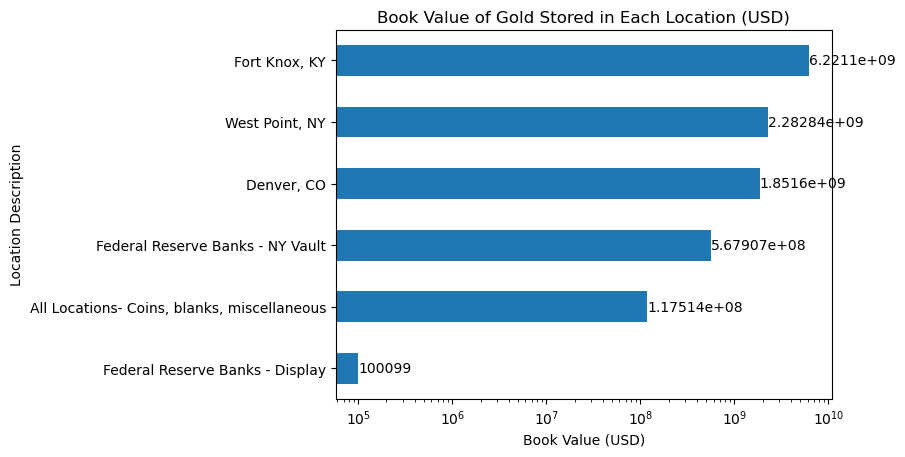

In [22]:
# Get the records created at `2024-01-31`.
records = df[
    df["Record Date"] == "2024-01-31"
]

fig3_data = fig1_data[::-1]

fig3 = fig3_data.plot.barh(y="Book Value", 
                           title="Book Value of Gold Stored in Each Location (USD)", 
                           legend=False, 
                           logx=True, 
                           xlabel="Book Value (USD)")

# Add actual book value for each bar
annotations = fig3.bar_label(fig3.containers[0])

4. <u>Average ounce of gold bullion stored in each facility in 2022</u>. Figure 4 displays a similar pattern of the book values in each facility shown in figure 3 - 3 deep storages stores has the most gold stored, `Federal Reserve Banks - NY Vault` and "all locations" in between, and `Federal Reserve Banks - Display` holds much less gold than others. This implies that the book value of gold in a storage could be proportional to the ounces of gold it stores.

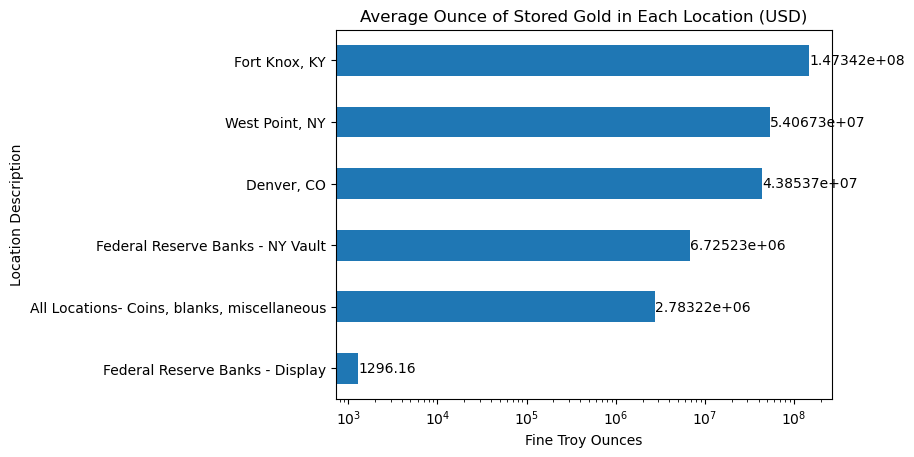

In [23]:
# Get the records created in 2022.
records = df[
    df["Calendar Year"] == 2022
][["Location Description", "Fine Troy Ounces"]]

# Extract and sort data
fig4_data = records.groupby("Location Description") \
                   .agg({"mean"})
fig4_data = fig4_data.sort_values(by=("Fine Troy Ounces", "mean"), ascending=True)

fig4 = fig4_data.plot.barh(y="Fine Troy Ounces", 
                           title="Average Ounce of Stored Gold in Each Location (USD)", 
                           legend=False, 
                           logx=True, 
                           xlabel="Fine Troy Ounces")

# Add actual book value for each bar
annotations = fig4.bar_label(fig4.containers[0])

5. <u>Unit price of gold bullion for each month in 2020</u>. Surpringly, figure 5 shows that the unit price of gold bullion is exactly the same for the entire 2022 (in fact, it is identical upto 4 decimal places)! While this is unusual, I believe the result is valid for:
+ the data validity was verified in [Data Munging](#data-munging);
+ the data is from [Fiscal Data](https://fiscaldata.treasury.gov), which is created by Department of the Treasury and the Bureau of the Fiscal Service.

Calendar Month Number
1     42.2222
2     42.2222
3     42.2222
4     42.2222
5     42.2222
6     42.2222
7     42.2222
8     42.2222
9     42.2222
10    42.2222
11    42.2222
12    42.2222
Name: Unit Price, dtype: float64

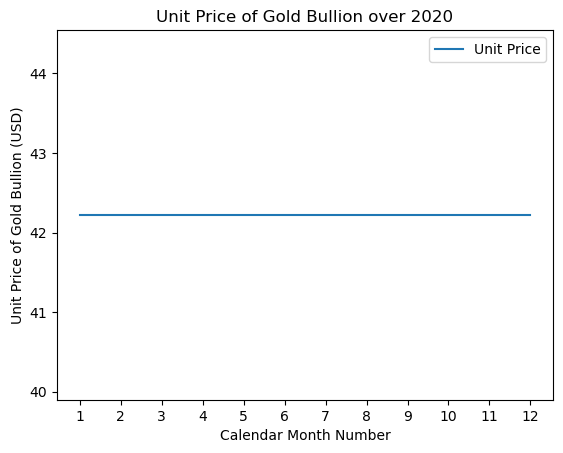

In [24]:
# Get the records created in 2020.
records = df[
    (df["Calendar Year"] == 2020)
    & (df["Form Description"] == "Gold Bullion")
][["Calendar Month Number", "Fine Troy Ounces", "Book Value"]]

# Find unit price (total book value / Fine Troy Ounces) for each month.
fig5_data = records.groupby("Calendar Month Number") \
                   .agg({"sum"})
fig5_data["Unit Price"] = fig5_data["Book Value"] / fig5_data["Fine Troy Ounces"]

fig5_data.plot(y="Unit Price", 
               title="Unit Price of Gold Bullion over 2020", 
               ylabel="Unit Price of Gold Bullion (USD)", 
               xticks=fig5_data.index)
fig5_data["Unit Price"]